In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [2]:
import tensorflow as tf
import IPython.display as display
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import matplotlib.pyplot as plt

In [3]:
CSV = pd.read_csv('/tagging_data.csv', usecols=['development', 'image_id'])
print(CSV.head())

   development       image_id
0            0  S26047238.jpg
1            1  P26057146.jpg
2            1  P26054308.jpg
3            1  P26050957.jpg
4            0  P26057962.jpg


In [0]:
# from google.colab import files
# uploaded = files.upload()
IMAGE_DIR = '/content/split_imageys/'

In [0]:
# import zipfile
# import io
# data = zipfile.ZipFile(io.BytesIO(uploaded['split_imageys.zip']), 'r')
# data.extractall()

In [0]:
# !mkdir images
# !mkdir /content/images/split_imageys
# !unzip -q /split_imageys.zip /content/images/split_imageys

In [0]:
# data.printdir()

(1164, 1549)


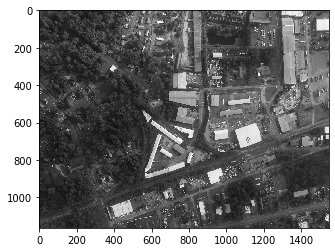

In [8]:
im = cv2.imread(os.path.join(IMAGE_DIR, '_training_images/C26048210.jpg'), 0)
plt.imshow(im, cmap=plt.get_cmap(name='gray'))
print(im.shape)

In [9]:

training_names = os.listdir('/content/split_imageys/_training_images')

testing_names = os.listdir('/content/split_imageys/_testing_images')

# Training and testing labels from CSV
training_labels = np.array([1,1,0,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,0,1,0,0,1,1,0,1,1,0,0,1,1,1,1,1,0,0,0,0,0,1,0,1,0,1,1,
                           0,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,1,0,1,1,1,1,
                           1,0,1,1,1,0,0,0,1,0,0,0,0,1,0,0,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,0,
                           1,1,1,1,0,1,1,1,1,1,1,0,1,1,0,0,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,
                           1,0,0,1,0,1,1,1,0,1,0,0,1,0,1,1,1,0,1])

testing_labels = np.array([1,0,1,1,1,1,0,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,0,1,0,1,1,0,1,1,
                            1,1,1,0,0,0,1,1,1,0,1,1,0,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,
                            0,0,0,1,1,1,1,1,1,1,1])

# Create empty arrays to fill with image data
x_train = np.empty((173, 512, 512))
x_test = np.empty((75, 512, 512))


# Populate arrays to create tuple for this architecture
index1 = index2 = 0
for name in training_names:
  im = cv2.imread(os.path.join('/content/split_imageys/_training_images/', name), 0)
  newimg = cv2.resize(im,(512, 512))
  x_train[index1, ...] = newimg
  index1 +=1

for name in testing_names:
  im = cv2.imread(os.path.join('/content/split_imageys/_testing_images/', name), 0)
  newimg = cv2.resize(im,(512, 512))
  x_test[index2, ...] = newimg
  index2 +=1


print("x_train shape:", x_train.shape, "x_test shape:", x_test.shape)

x_train shape: (173, 512, 512) x_test shape: (75, 512, 512)


x_train shape: (173, 512, 512) y_train shape: (173,)
173 train set
75 test set
y = 0 Undeveloped


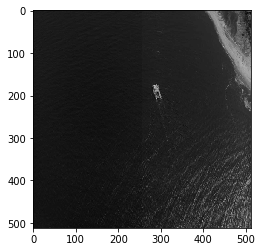

In [10]:
# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)
print("x_train shape:", x_train.shape, "y_train shape:", training_labels.shape)

# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# Define the text labels
development_labels = ["Undeveloped",  # index 0
                        "Developed"   # index 1
                      ]

# Image index, you can pick any number between 0 and 173
img_index = 10
# y_train contains the lables, ranging from 0 to 9
label_index = training_labels[img_index]
# Print the label, for example 2 Pullover
print ("y = " + str(label_index) + " " +(development_labels[label_index]))
# # Show one of the images from the training dataset
plt.imshow(x_train[img_index], cmap=plt.get_cmap(name='gray'))

In [0]:
# Normalize pixel values between 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [12]:
print("Number of train data - " + str(len(x_train)))
print("Number of test data - " + str(len(x_test)))

Number of train data - 173
Number of test data - 75


In [13]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[:130], x_train[130:] 
(y_train, y_valid) = training_labels[:130], training_labels[130:]

# Reshape input data from (512, 512) to (512, 512, 1)
w, h = 512, 512
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

y_test = testing_labels
# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 2)
y_valid = tf.keras.utils.to_categorical(y_valid, 2)
y_test = tf.keras.utils.to_categorical(y_test, 2)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (130, 512, 512, 1) y_train shape: (130, 2)
130 train set
43 validation set
75 test set


In [14]:
model = tf.keras.Sequential()

# CONV 1 64 3x3 filters at stride 1, pad 1
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=(512, 512 ,1))) 

# BN 1
model.add(tf.keras.layers.BatchNormalization())

# MAX POOL 1
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.5))

# CONV 2
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))

# BN 2
model.add(tf.keras.layers.BatchNormalization())

# MAX POOL 2
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.5))

# CONV 3
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))

# BN 3
model.add(tf.keras.layers.BatchNormalization())

# MAX POOL 3
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.5))

# CONV 4
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))

# BN 4
model.add(tf.keras.layers.BatchNormalization())

# MAX POOL 4
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.5))

# CONV 5
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))

# BN 5
model.add(tf.keras.layers.BatchNormalization())

# MAX POOL 5
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.5))

# CONV 6
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))

# BN 6
model.add(tf.keras.layers.BatchNormalization())

# MAX POOL 6
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.5))

# CONV 7
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))

# BN 7
model.add(tf.keras.layers.BatchNormalization())

# MAX POOL 7
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(2, activation='softmax'))

# Take a look at the model summary
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 512, 512, 64)      640       
_________________________________________________________________
batch_normalization (BatchNo (None, 512, 512, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 256, 256, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 256, 256, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 64)      36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 256, 256, 64)      256       
_________________________________________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [16]:
model.fit(x_train,
         y_train,
         batch_size=5,
         # Change to 20 epochs 
         epochs=20,
         validation_data=(x_valid, y_valid),
         )

Train on 130 samples, validate on 43 samples
Epoch 1/20
130/130 [==============================] - 4s 33ms/sample - loss: 1.9285 - acc: 0.6000 - val_loss: 0.6166 - val_acc: 0.6977
Epoch 2/20
130/130 [==============================] - 2s 13ms/sample - loss: 2.3375 - acc: 0.5923 - val_loss: 0.6552 - val_acc: 0.6977
Epoch 3/20
130/130 [==============================] - 2s 13ms/sample - loss: 2.2231 - acc: 0.5846 - val_loss: 0.6138 - val_acc: 0.6977
Epoch 4/20
130/130 [==============================] - 2s 13ms/sample - loss: 1.7822 - acc: 0.5923 - val_loss: 0.6395 - val_acc: 0.6977
Epoch 5/20
130/130 [==============================] - 2s 13ms/sample - loss: 1.3423 - acc: 0.5615 - val_loss: 0.6903 - val_acc: 0.5581
Epoch 6/20
130/130 [==============================] - 2s 13ms/sample - loss: 1.2433 - acc: 0.6308 - val_loss: 1.0230 - val_acc: 0.3023
Epoch 7/20
130/130 [==============================] - 2s 13ms/sample - loss: 0.8108 - acc: 0.6385 - val_loss: 1.1619 - val_acc: 0.3023
Epoch 8/20

In [17]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.73333335


array([[ 1, 20],
       [ 0, 54]])

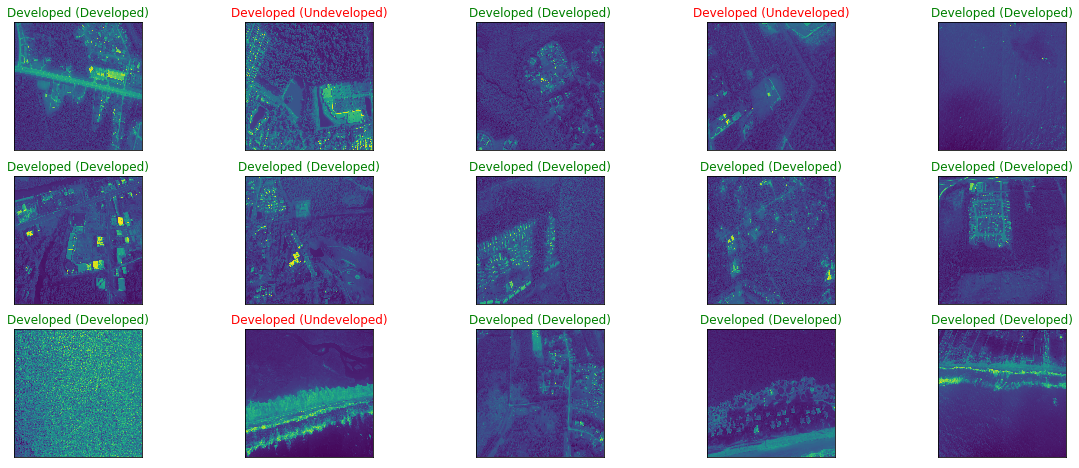

In [36]:
from sklearn import metrics
y_hat = model.predict(x_test)


# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(development_labels[predict_index], 
                                  development_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
    
y_pred = (y_hat > 0.5)    
matrix = metrics.confusion_matrix(y_test.argmax(axis=1), y_hat.argmax(axis=1))
matrix
# report = metrics.classification_report(y_test, y_hat, target_names=list(development_labels))
# print(report) 